## 1. 잡음 제거

In [1]:
# 1. 평균값 필터
# 필터에 1을 곱해야 함
# img는 uint8 타입이기 때문
import numpy as np

def mean_blur(img):
    a = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape
    for y in range(1, height-1):
        for x in range(1, width-1):
            S = 1*img[y-1, x-1] + img[y-1, x] + img[y-1, x+1] \
                + img[y , x-1] + img[y , x] + img[y , x+1] \
                + img[y+1, x-1] + img[y+1, x] + img[y+1, x+1]
            S = S / 9
            if S > 255:
                a[y, x] = 255
            elif S < 0:
                a[y, x] = 0
            else:
                a[y, x] = int(S)

    return a

In [2]:
import cv2
lena_gray = cv2.imread("images/lena_std_5.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Lena", lena_gray)
cv2.imshow("Mean Blur", mean_blur(lena_gray))

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
import cv2
lena_gray = cv2.imread("images/lena_std_5.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Lena", lena_gray)
cv2.imshow("Mean Blur", cv2.blur(lena_gray, ksize=(3,3)))

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
# 2. median filter
import numpy as np

def median_blur(img):
    a = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape[:2]

    for y in range(height):
        for x in range(width):
            S = [img[y-1, x-1] + img[y-1, x] + img[y-1, x+1] \
                 + img[y , x-1] + img[y , x] + img[y , x+1] \
                 + img[y+1, x-1] + img[y+1, x] + img[y+1, x+1]]
            a[y, x] = np.median(S)

    return a

In [5]:
import cv2
lena_gray = cv2.imread("images/lena_std_5.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Lena", lena_gray)
cv2.imshow("Median Blur", median_blur(lena_gray))

cv2.waitKey()
cv2.destroyAllWindows()

C:\Users\ameli\AppData\Local\Temp/ipykernel_22500/3994853702.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  S = [img[y-1, x-1] + img[y-1, x] + img[y-1, x+1] \


IndexError: index 256 is out of bounds for axis 1 with size 256

In [6]:
import cv2
lena_gray = cv2.imread('images/lena_std_5.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Lena', lena_gray)
cv2.imshow('Median', cv2.medianBlur(lena_gray, 3))
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
# 2. 가우시안 필터
import numpy as np

def gaussian_blur(img):
    img_ = np.zeros(img.shape, dtype=np.uint8)
    height, width = img.shape

    for y in range(1, height-1):
        for x in range(1, width-1):
            T = 1*img[y-1,x-1] + 2*img[y-1,x] + 1*img[y-1,x+1] \
            + 2*img[y ,x-1] + 4*img[y ,x] + 2*img[y ,x+1] \
            + 1*img[y+1,x-1] + 2*img[y+1,x] + 1*img[y+1,x+1]
            
            img_[y,x] = int(T/16)

    return img_

In [8]:
import cv2

lena_gray = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('Lena', lena_gray)
cv2.imshow('Lena', gaussian_blur(lena_gray))
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
# 3. bilateral filter
import cv2

lena_gray = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('Bilateral', cv2.bilateralFilter(lena_gray, 9, 75, 75))
cv2.imshow('Gaussian', cv2.GaussianBlur(lena_gray, (5, 5), 75))

cv2.waitKey()
cv2.destroyAllWindows()

## 2. 모폴로지 연산

In [10]:
# 수축
import cv2
import numpy as np

img = cv2.imread('images/j.png', 0)
kernel = np.ones((5, 5), np.uint8)

cv2.imshow('j', img)
# iterations는 수축 반복 횟수
cv2.imshow('erode', cv2.erode(img, kernel, iterations=1))

cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
# 팽창
import cv2
import numpy as np

img = cv2.imread('images/j.png', 0)
# 필터 크기 클수록 팽창의 정도도 커짐
kernel = np.ones((5, 5), np.uint8)

cv2.imshow('j', img)
cv2.imshow('dilate', cv2.dilate(img, kernel, iterations=1))

cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
# 수축 후 팽창과 팽창 후 수축
# 수축 후 팽창
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# 팽창 후 수축
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# 그래디언트 => 이미지의 팽창과 수축의 차이
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# 입력 이미지와 이미지 열기의 차이, 교차되는 부분에 대하여 탐색 가능
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# 수축과 입력 이미지의 차이
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# 이진 이미지에서 패턴 탐색
kernel_hitmiss = np.array([[0, -1, -1], [1, 1, -1], [0, 1, 0]], np.uint8)
hitmiss = cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel_hitmiss)

cv2.imshow('j', img)
cv2.imshow('opening', opening)
cv2.imshow('closing', closing)
cv2.imshow('gradient', gradient)
cv2.imshow('tophat', tophat)
cv2.imshow('blackhat', blackhat)
cv2.imshow('hitmiss', hitmiss)

cv2.waitKey()
cv2.destroyAllWindows()

## 3. 화질 개선

### 3.1 히스토그램과 밝기 조절

In [13]:
# 이미지 히스토그램 계산
import numpy as np

def histogram(img):
    height, width = img.shape
    hist = np.zeros(256)

    for y in range(height):
        for x in range(width):
            hist[img[y, x]] = hist[img[y, x]] + 1

    return hist

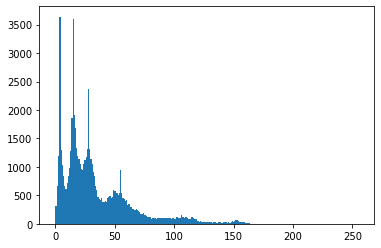

In [14]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/couple256.jpg', cv2.IMREAD_GRAYSCALE)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.show()

In [15]:
# 히스토그램 밝기 조절
import numpy as np
def brightness(img, threshold=0):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            temp = img[y][x] + threshold
            if (temp > 255):
                img_[y][x] = 255
            elif(temp < 0):
                img_[y][x] = 0
            else:
                img_[y][x] = temp
                
    return img_

In [16]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = brightness(img, threshold=100)

cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

(0.0, 256.0)

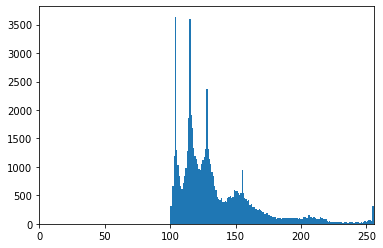

In [17]:
import matplotlib.pyplot as plt

img2 = brightness(img, threshold=100)
plt.bar(x=list(range(256)), height=histogram(img2), width=1)
plt.xlim([0,256])

### 3.2 콘트라스트 강조

In [18]:
def contrast(img, low=0, high=255):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            temp =(int)((255/(high-low)) * (img[y][x]-low))
            if (temp > 255):
                img_[y][x] = 255
            elif (temp < 0):
                img_[y][x] = 0
            else:
                img_[y][x] = temp

    return img_

In [19]:
img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 0, 160)

cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

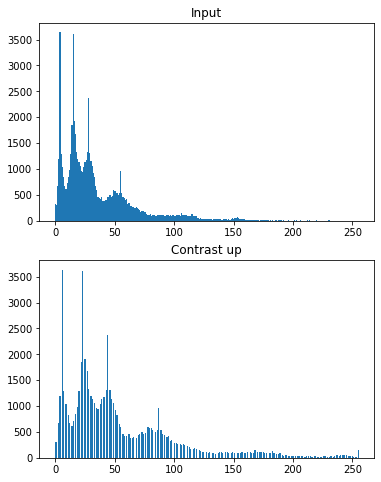

In [20]:
# 콘트라스트 강조 전후 히스토그램 비교
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = contrast(img, 0, 160)

plt.figure(figsize=(6,8))

plt.subplot(211)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.title("Input")

plt.subplot(212)
plt.bar(x=range(256), height=histogram(img2), width=1)
plt.title("Contrast up")

plt.show()

### 3.3 cv2.normalize()

In [21]:
import cv2

img = cv2.imread('images/couple256.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape

for y in range(height):
    for x in range(width):
        if img[y, x] > 160:
            img[y, x] = 160

img2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('Image', np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

### 3.4 히스토그램 이퀄라이제이션

In [22]:
def equalization(img):
    height, width = img.shape
    img_in = img.copy()
    img_out = np.zeros(img_in.shape, dtype=np.uint8)
    histogram = np.zeros(256, dtype=int)
    sum_histo = np.zeros(256, dtype=int)

    for y in range(height):
        for x in range(width):
            histogram[img_in[y, x]] = histogram[img_in[y, x]] + 1

    sum = 0
    scale_factor = 255 / (width * height)

    for i in range(256):
        sum = sum + histogram[i]
        sum_histo[i] = np.ceil(sum*scale_factor)

    for y in range(height):
        for x in range(width):
            img_out[y, x] = sum_histo[img_in[y][x]]

    return img_out

In [23]:
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)

cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

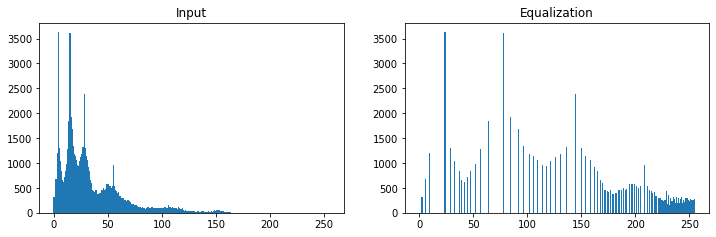

In [24]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = equalization(img)

plt.figure(figsize=(12,3.5))

plt.subplot(121)
plt.bar(x=range(256), height=histogram(img), width=1)
plt.title("Input")

plt.subplot(122)
plt.bar(x=range(256), height=histogram(img2), width=1)
plt.title("Equalization")

plt.show()

In [25]:
import cv2

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.equalizeHist(img)

cv2.imshow("Image", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

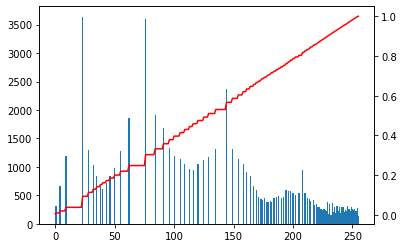

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/couple256.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.equalizeHist(img)

hist = histogram(img2)
cumsum_hist = np.cumsum(hist)
sum_hist = np.sum(hist)

plt.bar(range(256), hist, width=1)
ax = plt.twinx()
ax.plot(range(256), cumsum_hist/sum_hist, 'r')

plt.show()

### 3.5 적응적 히스토그램 이퀄라이제이션

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("images/tsukuba.png", cv2.IMREAD_GRAYSCALE)

img2 = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img3 = clahe.apply(img)

cv2.imshow('Equalization vs. CLAHE', np.c_[img2, img3])
cv2.waitKey()
cv2.destroyAllWindows()

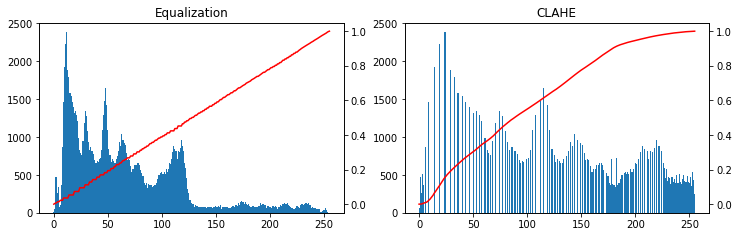

In [28]:
img = cv2.imread("images/tsukuba.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img3 = clahe.apply(img)

hist1 = histogram(img2)
cumsum_hist1 = np.cumsum(hist1)
sum_hist1 = np.sum(hist1)

hist2 = histogram(img3)
cumsum_hist2 = np.cumsum(hist2)
sum_hist2 = np.sum(hist2)

plt.figure(figsize=(12,3.5))

plt.subplot(121)
plt.bar(x=range(256), height=histogram(img), width=1)

ax = plt.twinx()
ax.plot(range(256), cumsum_hist1/sum_hist1, 'r')
plt.title("Equalization")

plt.subplot(122)
plt.bar(x=range(256), height=histogram(img2), width=1)

ax = plt.twinx()
ax.plot(range(256), cumsum_hist2/sum_hist2, 'r')
plt.title("CLAHE")

plt.show()

### 3.6 완벽하게 평평한 히스토그램 이퀄라이제이션

In [29]:
# 현재 화소의 위치와 그 화소의 주위 8화소 총합 저장하는 클래스
class SortedPixel():
    def __init__(self, x, y, weight) -> None:
        self.x = x
        self.y = y
        self.weight = weight

In [31]:
# 현재 화소 주위 8화소의 총합 구함
def get_weight(pixels, x, y):
    weight = 0
    xm = x-1
    ym = y-1
    xp = x+1
    yp = y+1
    d = np.zeros(8, dtype=int)
    height, width = pixels.shape

    if (xm < 0): xm = x
    if (ym < 0): ym = y
    if (xp >= width): xp = x
    if (yp >= height): yp = y

    d[0]=pixels[ym, xm]; d[1]=pixels[ym, x]; d[2]=pixels[ym, xp]
    d[3]=pixels[y, xm]; d[4]=pixels[y, xp]
    d[5]=pixels[yp, xm]; d[6]=pixels[yp, x]; d[7]=pixels[yp, xp]

    weight = np.sum(d)

    return weight

In [32]:
# 주위 8개 화소의 총합을 이용해 정렬하는 함수
from operator import attrgetter

def sort_by_weight(pixels, level, count):
    height, width = pixels.shape
    data = []
    inum = 0
    weight = 0

    for y in range(height):
        for x in range(width):
            try:
                if(pixels[y,x]==level):
                    w = get_weight(pixels, x, y)
                    data.append(SortedPixel(x, y, w))
                    inum = inum + 1
            except:
                pass

    data.sort(key=attrgetter('weight'))

    return data

In [33]:
# 히스토그램 평탄화 구현
def flattening(img):
    height, width = img.shape
    img_in = img.copy()
    img_out = np.zeros(img.shape, dtype=np.uint8)
    histogram = np.zeros(256, dtype=int)

    for y in range(height):
        for x in range(width):
            histogram[img_in[y,x]] = histogram[img_in[y,x]] + 1
        low, high, delta = 255, 255, 0
        avg_pixel_count = (int)((height*width)/256)

    for i in range(255,-1,-1):
        sum = 0
        while (sum < avg_pixel_count):
            sum = sum + histogram[low]
            low = low - 1

        low = low + 1
        delta = histogram[low]-(sum-avg_pixel_count)
        buffer = sort_by_weight(img_in, low, histogram[low])

        if (low<high):
            for y in range(height):
                for x in range(width):
                    if(img_in[y,x]>=low+1) & (img_in[y,x]<=high) :
                        img_out[y,x] = i

        for j in range(delta):
            img_out[int(buffer[j].y), int(buffer[j].x)] = i
            img_in[int(buffer[j].y), int(buffer[j].x)] = low+1

        histogram[low] = histogram[low] - delta
        high = low

    return img_out

In [34]:
import cv2

img = cv2.imread("images/tsukuba.png", cv2.IMREAD_GRAYSCALE)
img2 = flattening(img)

cv2.imshow("Image flattening", np.c_[img, img2])
cv2.waitKey()
cv2.destroyAllWindows()

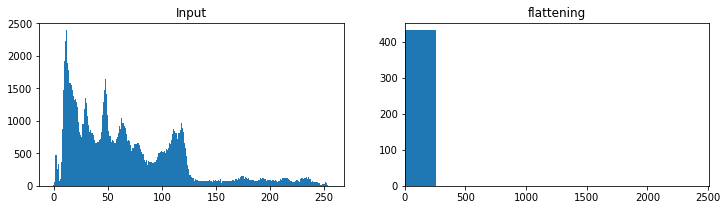

In [35]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("images/tsukuba.png", cv2.IMREAD_GRAYSCALE)
img2 = flattening(img)

hist1 = cv2.calcHist(images=[img], channels=[0], mask=None,
histSize=[256], ranges=[0,256]) # 원본 이미지의 히스토그램
hist2 = cv2.calcHist(images=[img2], channels=[0], mask=None,
histSize=[256], ranges=[0,256]) # 평탄화 이미지의 히스토그램

plt.figure(figsize=(12,3))

plt.subplot(121)
plt.bar(x=range(256), height=hist1.flatten(), width=1)
plt.title("Input")
y_lim = plt.ylim() # 첫 번째 그래프의 y축을 저장

plt.subplot(122)
plt.bar(x=range(256), height=hist2.flatten(), width=1)
plt.xlim(y_lim) # 첫 번째 그래프의 y축 범위와 같게 지정
plt.title("flattening")

plt.show()

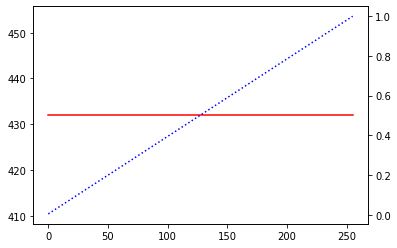

In [36]:
import cv2

img = cv2.imread("images/tsukuba.png", cv2.IMREAD_GRAYSCALE)
img2 = flattening(img)

hist2 = cv2.calcHist(images=[img2], channels=[0], mask=None, histSize=[256], ranges=[0,256])
cumsum_hist = np.cumsum(hist2)
sum_hist = np.sum(hist2)

plt.plot(range(256), hist2, 'r')
ax = plt.twinx()
ax.plot(range(256), cumsum_hist/sum_hist, 'b:')

plt.show()